In [1]:
import random as rand
import numpy as np
import matplotlib.pyplot as plt

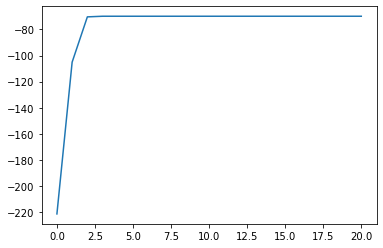

In [7]:
class SA():
    
    def __init__(self, t, Best_solution, x1_range, x2_range):
        self.t = t
        self.Best_solution = Best_solution
        self.x1_range = x1_range
        self.x2_range = x2_range
        
    def function(self, x1, x2):
        fx = 100*(x2 + (-0.01*(x1**2)) + 1) + 0.01*(x1+10)**2
        return fx

    def temp_update(self, t):
        delta_t = 1 - np.sin(t)
        t -= delta_t
        return t
    
    def new_candidtate(self, x1, x2):
        new_x1 = x1 + np.cos(x1)
        new_x2 = x2 + np.cos(x1)
        if (new_x1 not in self.x1_range) and (new_x2 not in self.x2_range):
            new_x1 = x1 + np.cos(x1)
            new_x2 = x2 + np.cos(x1)
        return new_x1, new_x2
    
    def store_or_pass(self, x1, x2):
        y = self.function(x1, x2)
        if (y < self.Best_solution) or (rand.random() > np.exp((y - self.Best_solution)/t)):
            Best_solution = y
            list_solution.append(Best_solution)
        else:
            
            pass
        return Best_solution, list_solution

        
t = 100
Best_solution = 1000
iter_ = 20
list_solution = []
x1_range = range(-15, -5)
x2_range = range(-3, 3)

x1 = rand.uniform(-15,-5)
x2 = rand.uniform(-3,3)
sa = SA(t, Best_solution, x1_range, x2_range)
Best_solution = sa.store_or_pass(x1, x2)
t = sa.temp_update(t)
x1, x2 = sa.new_candidtate(x1,x2)

for a in range(iter_):    
    if t >= 0:
        Best_solution, list_solution = sa.store_or_pass(x1, x2)
        x1, x2 = sa.new_candidtate(x1, x2)
        t = sa.temp_update(t)
plt.plot(list_solution)
plt.show() 

In [171]:
min(list_solution)

-142.39565599081746